In [2]:
#importing libraries to perform data manipulation and analysis 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
pd.set_option('display.max_columns', 500)#setting ".max_columns" parameter to 500 to display all the columns present in the dataset

In [3]:
#tracing the path of the downloaded dataset
path = 'Downloads/US_Accidents_March23.csv'

In [224]:
data = pd.read_csv(path)
data.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,45417-2476,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,45405,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,45404-1923,US,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,SW,1.2,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,43081

In [342]:
#accessing the first 5000 rows of the dataset for further use 
data1 = data.loc[0:5000]
data1

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,A-4997,Source2,2,2016-08-01 11:41:23,2016-08-01 12:26:23,38.258327,-122.065071,NaN,NaN,0.00,Accident on Travis Blvd at Holiday Ln.,Travis Blvd,Fairfield,Solano,CA,94534-3457,US,US/Pacific,KAPC,2016-08-01 11:54:00,68.0,NaN,63.0,29.95,10.0,SSW,9.2,NaN,Clear,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
4997,A-4998,Source2,2,2016-08-01 11:57:27,2016-08-01 12:42:27,38.510632,-122.985100,NaN,NaN,0.00,Accident on River Rd at Orchard Rd.,River Rd,Guerneville,Sonoma,CA,95446-9573,US,US/Pacific,KSTS,2016-08-01 11:53:00,68.0,NaN,59.0,29.96,10.0,Variable,3.5,NaN,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4998,A-4999,Source2,2,2016-08-01 12:00:54,2016-08-01 12:30:54,38.618111,-121.410683,NaN,NaN,0.00,Accident on Marconi Ave at Bell St.,Bell St,Sacramento,Sacramento,CA,95821-4623,US,US/Pacific,KMCC,2016-08-01 11:55:00,80.6,NaN,34.0,29.94,7.0,South,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4999,A-5000,Source2,2,2016-08-01 11:59:44,2016-08-01 12:29:44,38.657719,-121.363869,NaN,NaN,0.00,Accident on Madison Ave Westbound at I-80.,I-80 W,Sacramento,Sacramento,CA,95841,US,US/Pacific,KMCC,2016-08-01 11:55:00,80.6,NaN,34.0,29.94,7.0,South,6.9,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [247]:
#checking columns in the dataset
data1.columns

Index(['ID', 'Source', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [248]:
#Number of columns in the dataset 
print("Total Number of Columns in the dataset:",len(data1.columns))

Total Number of Columns in the dataset: 44


In [249]:
#Number of rows in the dataset
print("Total Number of Rows in the dataset:",len(data1))

Total Number of Rows in the dataset: 5001


In [250]:
 #using the ".info()" function to obtain a summary of the dataframe 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5001 non-null   object 
 1   Source                 5001 non-null   object 
 2   Severity               5001 non-null   int64  
 3   Start_Lat              5001 non-null   float64
 4   Start_Lng              5001 non-null   float64
 5   End_Lat                0 non-null      float64
 6   End_Lng                0 non-null      float64
 7   Distance(mi)           5001 non-null   float64
 8   Description            5001 non-null   object 
 9   Street                 5001 non-null   object 
 10  City                   5001 non-null   object 
 11  County                 5001 non-null   object 
 12  State                  5001 non-null   object 
 13  Zipcode                5001 non-null   object 
 14  Country                5001 non-null   object 
 15  Time

In [251]:
#using the ".describe()" function to obtain a summary of descriptive statistics for numerical columns
data1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,5001.000000,5001.000000,5001.000000,0.0,0.0,5001.000000,4979.000000,460.000000,4979.000000,4981.000000,4959.000000,4542.000000,192.000000
mean,2.411718,38.277032,-116.242884,NaN,NaN,0.006869,69.849166,23.368696,51.828680,29.935445,9.465719,9.396191,0.021146
std,0.495837,0.873417,13.513440,NaN,NaN,0.129194,18.306975,11.198559,23.819914,0.405793,1.886454,4.310144,0.042076
min,1.000000,36.401604,-123.793976,NaN,NaN,0.000000,3.900000,-8.400000,8.000000,3.010000,0.200000,1.200000,0.000000
25%,2.000000,37.695385,-122.107246,NaN,NaN,0.000000,60.800000,17.075000,32.000000,29.860000,10.000000,5.800000,0.000000
50%,2.000000,38.026749,-121.723686,NaN,NaN,0.000000,71.100000,25.200000,51.000000,29.940000,10.000000,9.200000,0.000000
75%,3.000000,38.643410,-121.271286,NaN,NaN,0.000000,82.400000,30.800000,70.000000,30.020000,10.000000,11.500000,0.020000
max,4.000000,41.428753,-81.550728,NaN,NaN,7.070000,106.000000,66.000000,100.000000,30.620000,40.000000,31.100000,0.220000


In [252]:
#using the ".describe()" function to obtain the statistical summary of any type of value 
data1.describe(include='all')

,ID,Source,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,5001,5001,5001.000000,5001.000000,5001.000000,0.0,0.0,5001.000000,5001,5001,5001,5001,5001,5001,5001,5001,5001,4982,4979.000000,460.000000,4979.000000,4981.000000,4959.000000,4982,4542.000000,192.000000,4965,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001,5001
unique,5001,2,NaN,NaN,NaN,NaN,NaN,NaN,4443,1571,351,62,3,1480,1,2,71,2950,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,21,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,A-1,Source2,NaN,NaN,NaN,NaN,NaN,NaN,Accident on I-80 Westbound at Exits 8A 8B I-880.,I-80 E,Sacramento,Sacramento,CA,94551,US,US/Pacific,KMCC,2016-06-22 10:53:00,NaN,NaN,NaN,NaN,NaN,WNW,NaN,NaN,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,4985,NaN,NaN,NaN,NaN,NaN,NaN,9,198,555,811,4273,71,5001,4273,398,12,NaN,NaN,NaN,NaN,NaN,746,NaN,NaN,3427,4944,4997,4534,4987,4383,4995,4956,4999,4936,4789,4995,4413,5001,3747,3978,4159,4381
mean,NaN,NaN,2.411718,38.277032,-116.242884,NaN,NaN,0.006869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.849166,23.368696,51.828680,29.935445,9.465719,NaN,9.396191,0.021146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.495837,0.873417,13.513440,NaN,NaN,0.129194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.306975,11.198559,23.819914,0.405793,1.886454,NaN,4.310144,0.042076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,36.401604,-123.793976,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.900000,-8.400000,8.000000,3.010000,0.200000,NaN,1.200000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.000000,37.695385,-122.107246,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.800000,17.075000,32.000000,29.860000,10.000000,NaN,5.800000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,38.026749,-121.723686,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.100000,25.200000,51.000000,29.940000,10.000000,NaN,9.200000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,38.643410,-121.271286,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.400000,30.800000,70.000000,30.020000,10.000000,NaN,11.500000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
#using the ".select_dtypes" to obtain the total number of numeric columns from the dataframe "data1"
len(data1.select_dtypes(["int64","float64"]).columns)

13

In [254]:
#using the ".select_dtypes" to obtain the total number of string/object and boolean datatype columns from the dataframe "data1"
len(data1.select_dtypes(["object","bool"]).columns)

31

In [255]:
#accessing the values of all the columns in the 5th row from the dataframe "data1"
data1.iloc[4]

ID                                                                     A-5
Source                                                             Source2
Severity                                                                 2
Start_Lat                                                        39.627781
Start_Lng                                                       -84.188354
End_Lat                                                                NaN
End_Lng                                                                NaN
Distance(mi)                                                          0.01
Description              Accident on McEwen Rd at OH-725 Miamisburg Cen...
Street                                           Miamisburg Centerville Rd
City                                                                Dayton
County                                                          Montgomery
State                                                                   OH
Zipcode                  

In [256]:
#using the ".isnull()" function to retrieve the missing/null values in the dataframe "data1"
#The ".sum()" function counts the total number of missing/null values present in the dataframe
data1.isnull().sum()

ID                          0
Source                      0
Severity                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  5001
End_Lng                  5001
Distance(mi)                0
Description                 0
Street                      0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp          19
Temperature(F)             22
Wind_Chill(F)            4541
Humidity(%)                22
Pressure(in)               20
Visibility(mi)             42
Wind_Direction             19
Wind_Speed(mph)           459
Precipitation(in)        4809
Weather_Condition          36
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway   

In [257]:
#Alternatively, we van use the ".isnull()" function to retrieve the missing/null values in the dataframe "data1"
#The ".sum()" function counts the total number of missing/null values present in the dataframe
data1.isna().sum()

ID                          0
Source                      0
Severity                    0
Start_Lat                   0
Start_Lng                   0
End_Lat                  5001
End_Lng                  5001
Distance(mi)                0
Description                 0
Street                      0
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp          19
Temperature(F)             22
Wind_Chill(F)            4541
Humidity(%)                22
Pressure(in)               20
Visibility(mi)             42
Wind_Direction             19
Wind_Speed(mph)           459
Precipitation(in)        4809
Weather_Condition          36
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway   

In [258]:
#calculating the percentage of missing values in each column of the dataframe "data1" and sorting them in descending order 
missing_data = data1.isna().sum().sort_values(ascending=False) * 100. / len(data1)
missing_data

End_Lng                  100.000000
End_Lat                  100.000000
Precipitation(in)         96.160768
Wind_Chill(F)             90.801840
Wind_Speed(mph)            9.178164
Visibility(mi)             0.839832
Weather_Condition          0.719856
Humidity(%)                0.439912
Temperature(F)             0.439912
Pressure(in)               0.399920
Weather_Timestamp          0.379924
Wind_Direction             0.379924
Traffic_Signal             0.000000
Nautical_Twilight          0.000000
Civil_Twilight             0.000000
Crossing                   0.000000
Sunrise_Sunset             0.000000
Turning_Loop               0.000000
Give_Way                   0.000000
Junction                   0.000000
No_Exit                    0.000000
Bump                       0.000000
Roundabout                 0.000000
Station                    0.000000
Stop                       0.000000
Traffic_Calming            0.000000
Railway                    0.000000
ID                         0

In [259]:
type(missing_data)

pandas.core.series.Series

In [260]:
# Accessing the range of elements in the series within the dataframe "data1"
series = missing_data[::]
print(series)

End_Lng                  100.000000
End_Lat                  100.000000
Precipitation(in)         96.160768
Wind_Chill(F)             90.801840
Wind_Speed(mph)            9.178164
Visibility(mi)             0.839832
Weather_Condition          0.719856
Humidity(%)                0.439912
Temperature(F)             0.439912
Pressure(in)               0.399920
Weather_Timestamp          0.379924
Wind_Direction             0.379924
Traffic_Signal             0.000000
Nautical_Twilight          0.000000
Civil_Twilight             0.000000
Crossing                   0.000000
Sunrise_Sunset             0.000000
Turning_Loop               0.000000
Give_Way                   0.000000
Junction                   0.000000
No_Exit                    0.000000
Bump                       0.000000
Roundabout                 0.000000
Station                    0.000000
Stop                       0.000000
Traffic_Calming            0.000000
Railway                    0.000000
ID                         0

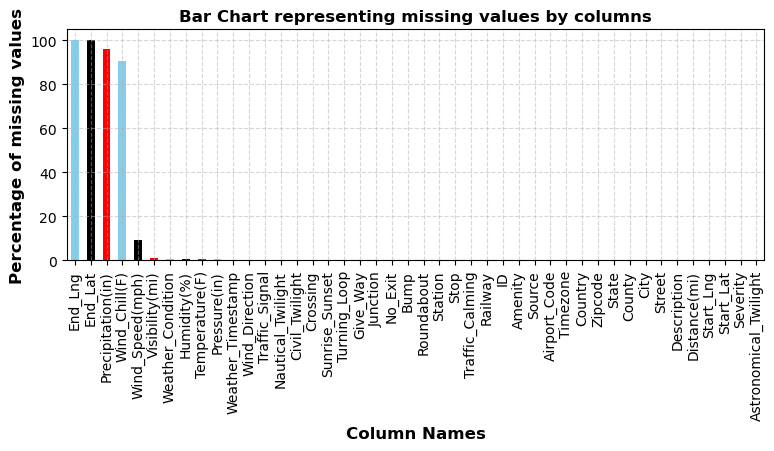

In [261]:
#Bar chart representing missing_data percentage by columns 
plt.figure(figsize=(9,3))
colors=["skyblue","black","red"]
missing_data.plot(kind="bar",color=colors,rot=90)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.title("Bar Chart representing missing values by columns",fontsize=12,fontweight='bold')
plt.xlabel("Column Names",fontsize=12,fontweight='bold')
plt.ylabel("Percentage of missing values",fontsize=12,fontweight='bold')
plt.show()

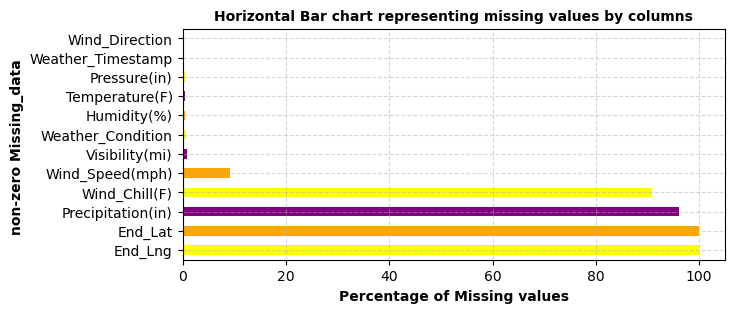

In [262]:
#Horizontal Bar chart representing missing_data percentage by columns 
plt.figure(figsize=(7,3))
colors=["yellow","orange","purple"]
missing_data[missing_data!=0].plot(kind='barh',color=colors)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.title("Horizontal Bar chart representing missing values by columns",fontsize=10,fontweight='bold')
plt.xlabel("Percentage of Missing values",fontsize=10,fontweight='bold')
plt.ylabel("non-zero Missing_data ",fontsize=10,fontweight='bold')
plt.show()

In [263]:
#using the ".unique()" function to find the unique values in the column City of data1
cities=data1.City.unique()
cities[:30]

array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel'], dtype=object)

In [264]:
#using the "len" function to print the number of cities present in the dataframe
len(cities)

351

In [265]:
#using the ".unique()" function to find the unique values in the column weather_condition of data1
weather=data1.Weather_Condition.unique()
weather

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke'], dtype=object)

In [266]:
#counting the number of accidents city-wise from "data1"
accidents_cities=data1.City.value_counts()
accidents_cities[:10]#printing the first 50 cities 

City
Sacramento       555
Dayton           321
San Jose         251
Columbus         170
Oakland          158
San Francisco    127
Stockton         122
Tracy            117
Hayward          100
Livermore         86
Name: count, dtype: int64

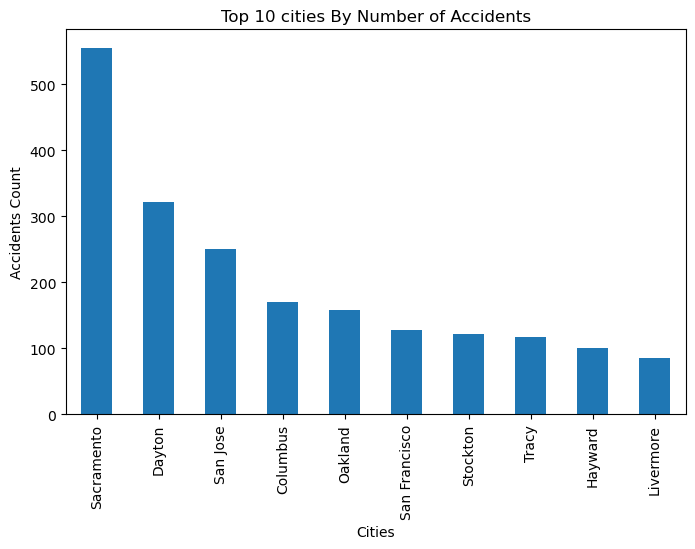

In [267]:
#top 10 cities with highest number of accidents
fig, ax = plt.subplots(figsize=(8,5))
accidents_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

Text(0, 0.5, 'accidents')

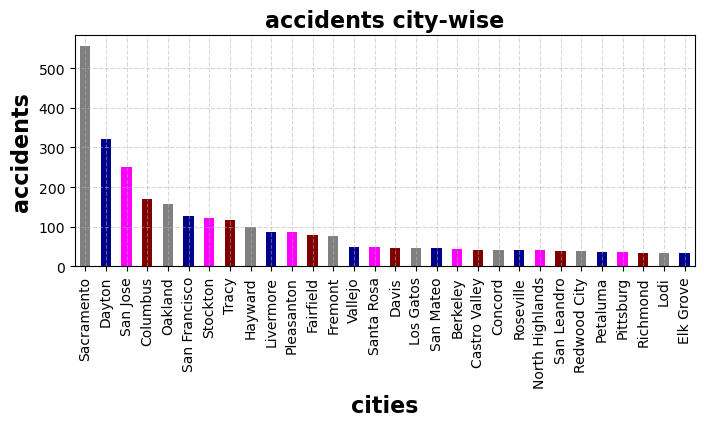

In [268]:
#plotting a bar graph to represnt accidents city-wise
plt.figure(figsize=(8,3))
colors=["grey","darkblue","magenta","maroon"]
accidents_cities[:30].plot(kind="bar",color=colors)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.title("accidents city-wise",fontsize=16,fontweight='bold')
plt.xlabel("cities",fontsize=16,fontweight='bold')
plt.ylabel("accidents",fontsize=16,fontweight='bold')

In [269]:
#checking the presence of "newark" in cities 
'Newark' in cities

True

In [270]:
#counting number of accidents in city "Newark"
acc=accidents_cities["Newark"]
acc

19

In [271]:
#counting the number of accidents weather-wise from "data1"
accidents_weather=data1['Weather_Condition'].value_counts()
accidents_weather

Weather_Condition
Clear                     3427
Partly Cloudy              459
Overcast                   404
Scattered Clouds           230
Mostly Cloudy              200
Light Snow                 104
Light Rain                  44
Haze                        42
Rain                        28
Light Freezing Drizzle      10
Fog                          3
Heavy Rain                   3
Snow                         2
Smoke                        2
Light Drizzle                1
Shallow Fog                  1
Light Freezing Rain          1
Cloudy                       1
Drizzle                      1
Light Rain Showers           1
Mist                         1
Name: count, dtype: int64

Text(0, 0.5, 'accidents')

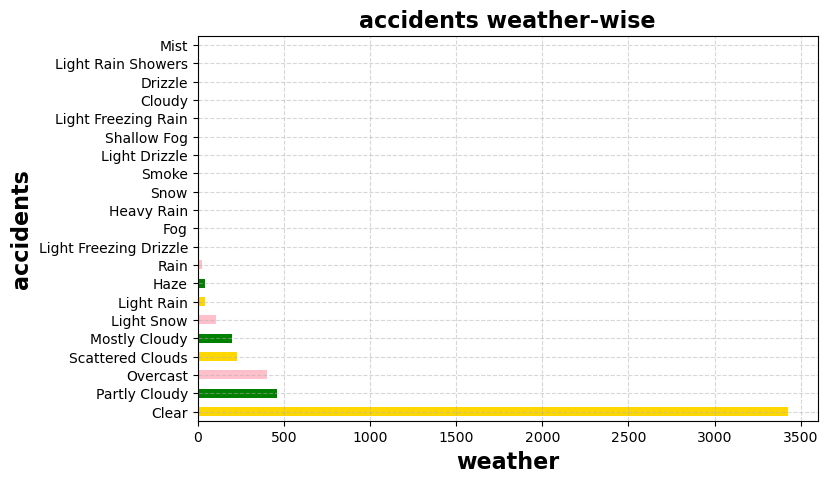

In [272]:
#plotting a horizontal bar graph to represnt accidents weather-wise
plt.figure(figsize=(8,5))
colors=["gold","green","pink"]
accidents_weather[::].plot(kind="barh",color=colors)
plt.grid(axis='x',linestyle='--',alpha=0.5)
plt.grid(axis='y',linestyle='--',alpha=0.5)
plt.title("accidents weather-wise",fontsize=16,fontweight='bold')
plt.xlabel("weather",fontsize=16,fontweight='bold')
plt.ylabel("accidents",fontsize=16,fontweight='bold')

In [273]:
#finding cities with accidents greater than 200 and cities with accidents less than 200
high_accidents_cities=accidents_cities[accidents_cities>=100]
low_accidents_cities=accidents_cities[accidents_cities<=500]
high_accidents_cities
low_accidents_cities

City
Dayton            321
San Jose          251
Columbus          170
Oakland           158
San Francisco     127
                 ... 
Burbank             1
Seaside             1
Travis Afb          1
Xenia               1
Mount Hamilton      1
Name: count, Length: 350, dtype: int64

In [274]:
#calculating the total number of cities having high accidents 
len(high_accidents_cities)

9

In [275]:
#calculating the total number of cities having low accidents
len(low_accidents_cities)

350

In [276]:
#finding the percentage of high accidents cities
(len(high_accidents_cities)/len(accidents_cities))*100

2.564102564102564

C:\Users\VEDANTA\AppData\Local\Temp\ipykernel_33344\73340130.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accidents_cities)
C:\Users\VEDANTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Density')

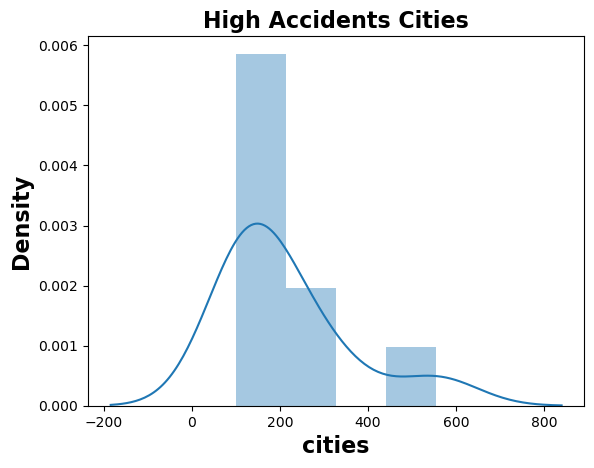

In [277]:
#plotting a displot to represent high_accidents_cities
sns.distplot(high_accidents_cities)
plt.xlabel("cities",fontsize=16,fontweight="bold")
plt.title("High Accidents Cities",fontsize=16,fontweight="bold")
plt.ylabel("Density",fontsize=16,fontweight="bold")

In [278]:
#finding the percentage of low accidents cities 
(len(low_accidents_cities)/len(accidents_cities))*100

99.71509971509973

C:\Users\VEDANTA\AppData\Local\Temp\ipykernel_33344\3764938717.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accidents_cities)
C:\Users\VEDANTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Density')

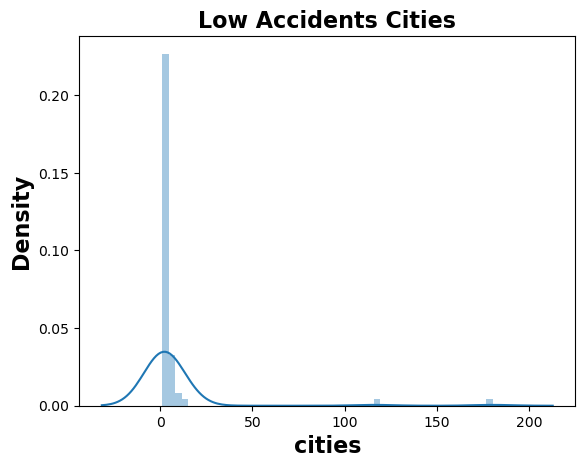

In [133]:
#plotting a displot to represent low accidents cities
sns.distplot(low_accidents_cities)
plt.xlabel("cities",fontsize=16,fontweight="bold")
plt.title("Low Accidents Cities",fontsize=16,fontweight="bold")
plt.ylabel("Density",fontsize=16,fontweight="bold")

In [281]:
accidents_cities[accidents_cities==1]

City
Brecksville       1
Cambridge         1
Casstown          1
Hopland           1
Blanchester       1
                 ..
Burbank           1
Seaside           1
Travis Afb        1
Xenia             1
Mount Hamilton    1
Name: count, Length: 100, dtype: int64

In [288]:
#checking time entries from 0-10
data.Start_Time[0:11]

0     2016-02-08 05:46:00
1     2016-02-08 06:07:59
2     2016-02-08 06:49:27
3     2016-02-08 07:23:34
4     2016-02-08 07:39:07
5     2016-02-08 07:44:26
6     2016-02-08 07:59:35
7     2016-02-08 07:59:58
8     2016-02-08 08:00:40
9     2016-02-08 08:10:04
10    2016-02-08 08:14:42
Name: Start_Time, dtype: object

In [285]:
#removing all the na values 
data1=data1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition','City','Sunrise_Sunset','Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Precipitation(in)','End_Lat','End_Lng'])

In [289]:
#finding the percentage of na values 
data1.isna().sum()/len(data1)*100

ID                         0.000000
Source                     0.000000
Severity                   0.000000
Start_Time                 0.000000
End_Time                   0.000000
Start_Lat                  0.000000
Start_Lng                  0.000000
End_Lat                  100.000000
End_Lng                  100.000000
Distance(mi)               0.000000
Description                0.000000
Street                     0.000000
City                       0.000000
County                     0.000000
State                      0.000000
Zipcode                    0.000000
Country                    0.000000
Timezone                   0.000000
Airport_Code               0.000000
Weather_Timestamp          0.379924
Temperature(F)             0.439912
Wind_Chill(F)             90.801840
Humidity(%)                0.439912
Pressure(in)               0.399920
Visibility(mi)             0.839832
Wind_Direction             0.379924
Wind_Speed(mph)            9.178164
Precipitation(in)         96

In [290]:
#finding the shape of the data
data1.shape

(5001, 46)

In [291]:
#finding unique cities in the dataset
len(data['City'].unique())

13679

In [293]:
#calculating the number of accidents by severity
accidents_severity = data1.groupby('Severity').count()['ID']
accidents_severity

Severity
1       4
2    2939
3    2053
4       5
Name: ID, dtype: int64

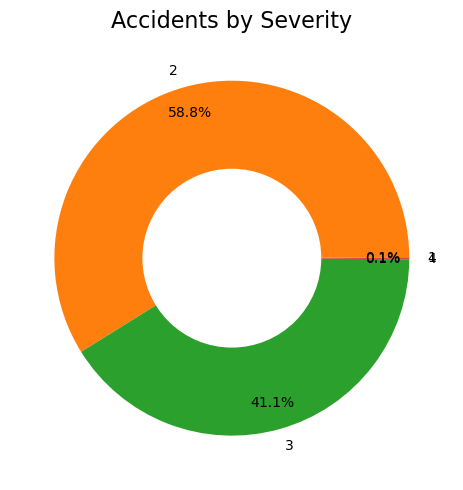

In [294]:
#piechart to represnt accidents by severity
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accidents by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [344]:
data1['Start_Time'].dtypes

dtype('O')

In [343]:
data1['End_Time'].dtypes

dtype('O')

In [345]:
# Checking the length of DataFrame
print(len(data1))

# Identify and clean problematic rows in the 'Start_Time' and 'End_Time' columns
# For example, you can filter out rows with unparseable datetime strings
data1 = data1[data1['Start_Time'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}$')]

# Convert the 'Start_Time' and 'End_Time' columns to datetime
data1['Start_Time'] = pd.to_datetime(data1['Start_Time'])
data1['End_Time'] = pd.to_datetime(data1['End_Time'])

# Access the 'Start_Time' column at a valid index
print(data1['Start_Time'].iloc[0])  # Replace 0 with a valid index

5001
2016-02-08 05:46:00


In [346]:
data1['start_date'] = [d.date() for d in data1['Start_Time']]
data1['start_time'] = [d.time() for d in data1['Start_Time']]
data1['end_date'] = [d.date() for d in data1['End_Time']]
data1['end_time'] = [d.time() for d in data1['End_Time']]
data1['end_time']

0       11:00:00
1       06:37:59
2       07:19:27
3       07:53:34
4       08:09:07
          ...   
4996    12:26:23
4997    12:42:27
4998    12:30:54
4999    12:29:44
5000    12:59:11
Name: end_time, Length: 5001, dtype: object

C:\Users\VEDANTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


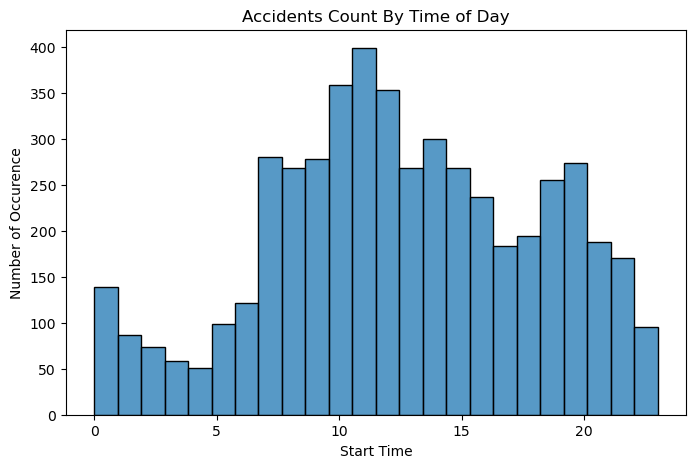

In [347]:
#calculating accidents by start time of the day
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')
plt.show()

C:\Users\VEDANTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


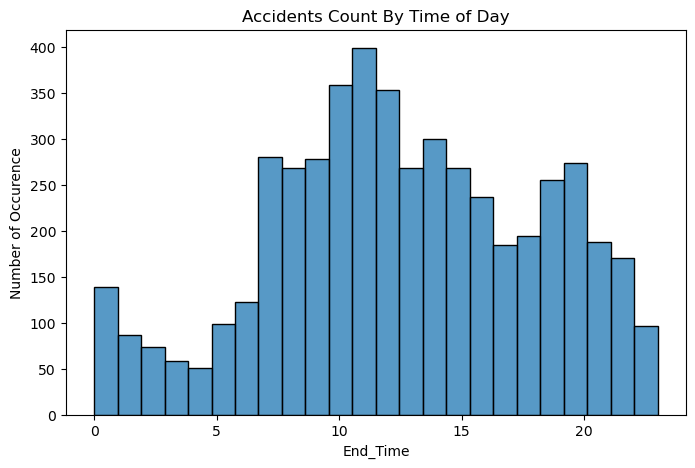

In [348]:
#calculating accidents by start time of the day
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(data1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [349]:
del data1['Start_Time']
del data1['End_Time']
%matplotlib inline
import os

<Axes: xlabel='Severity', ylabel='Start_Lat'>

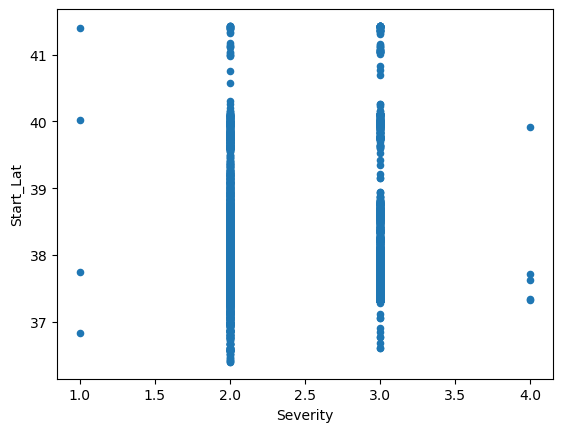

In [351]:
data1.plot(kind='scatter', y='Start_Lat', x='Severity')

C:\Users\VEDANTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VEDANTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


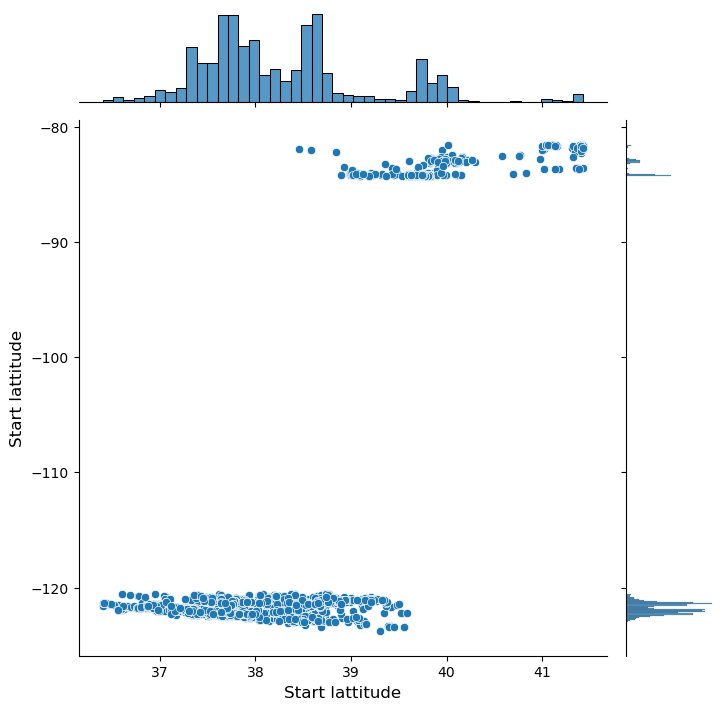

In [352]:
sns.jointplot(x=data1.Start_Lat.values , y=data1.Start_Lng.values,height=7)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

C:\Users\VEDANTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\VEDANTA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


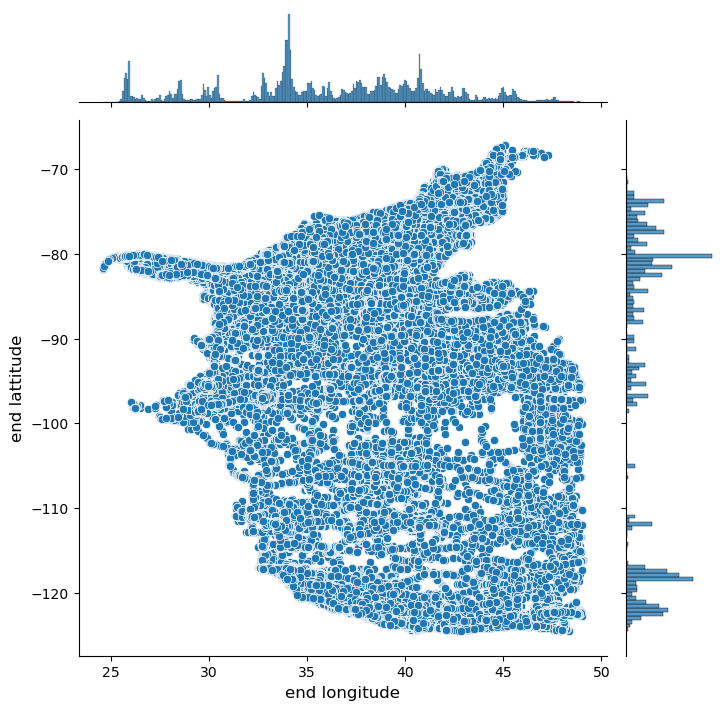

In [353]:
sns.jointplot(x=data.End_Lat.values , y=data.End_Lng.values,height=7)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()

In [354]:
data.Sunrise_Sunset.value_counts()

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64

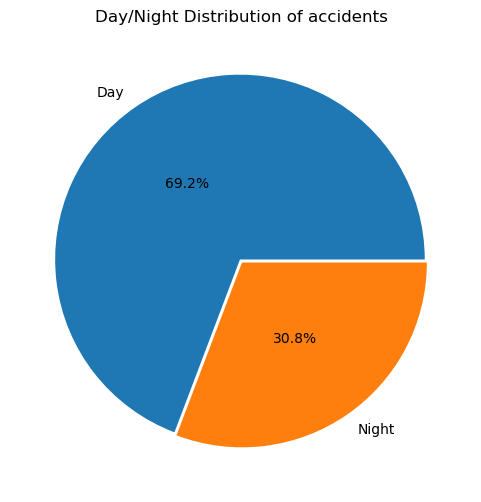

In [355]:
pie, ax = plt.subplots(figsize=[6,6])
labels = data.Sunrise_Sunset.value_counts().keys()
plt.pie(x=data.Sunrise_Sunset.value_counts(), autopct="%.1f%%", explode=[0.01]*len(data.Sunrise_Sunset.value_counts()), labels=labels, pctdistance=0.5)
plt.title("Day/Night Distribution of accidents")
plt.show();

In [356]:
data1.columns

Index(['ID', 'Source', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'start_date', 'start_time', 'end_date',
       'end_time'],
      dtype='object')

In [357]:
amenity = data.Amenity.groupby(data.Severity).value_counts()
amenity

Severity  Amenity
1         False        65987
          True          1379
2         False      6068089
          True         88892
3         False      1295307
          True          4030
4         False       202677
          True          2033
Name: count, dtype: int64

In [358]:
amenity.index

MultiIndex([(1, False),
            (1,  True),
            (2, False),
            (2,  True),
            (3, False),
            (3,  True),
            (4, False),
            (4,  True)],
           names=['Severity', 'Amenity'])

In [317]:
no_exit = data.No_Exit.groupby(data.Severity).value_counts()
no_exit

Severity  No_Exit
1         False        66985
          True           381
2         False      6140021
          True         16960
3         False      1297502
          True          1835
4         False       204341
          True           369
Name: count, dtype: int64

In [318]:
railway = data.Railway.groupby(data.Severity).value_counts()
railway

Severity  Railway
1         False        66302
          True          1064
2         False      6101200
          True         55781
3         False      1290760
          True          8577
4         False       203153
          True          1557
Name: count, dtype: int64

In [319]:
traffic_calming = data.Traffic_Calming.groupby(data.Severity).value_counts()
traffic_calming

Severity  Traffic_Calming
1         False                67280
          True                    86
2         False              6150420
          True                  6561
3         False              1298485
          True                   852
4         False               204611
          True                    99
Name: count, dtype: int64

In [320]:
stop = data.Stop.groupby(data.Severity).value_counts()
stop

Severity  Stop 
1         False      64723
          True        2643
2         False    5958591
          True      198390
3         False    1291686
          True        7651
4         False     199023
          True        5687
Name: count, dtype: int64

In [321]:
traffic_signal = data.Traffic_Signal.groupby(data.Severity).value_counts()
traffic_signal

Severity  Traffic_Signal
1         False               41025
          True                26341
2         False             5148309
          True              1008672
3         False             1210728
          True                88609
4         False              184560
          True                20150
Name: count, dtype: int64

In [322]:
give_way = data.Give_Way.groupby(data.Severity).value_counts()
give_way

Severity  Give_Way
1         False         66817
          True            549
2         False       6126858
          True          30123
3         False       1294598
          True           4739
4         False        203539
          True           1171
Name: count, dtype: int64

In [323]:
bump = data.Bump.groupby(data.Severity).value_counts()
bump

Severity  Bump 
1         False      67332
          True          34
2         False    6153837
          True        3144
3         False    1299031
          True         306
4         False     204680
          True          30
Name: count, dtype: int64

In [324]:
crossing = data.Crossing.groupby(data.Severity).value_counts()
crossing

Severity  Crossing
1         False         48675
          True          18691
2         False       5363435
          True         793546
3         False       1251305
          True          48032
4         False        191216
          True          13494
Name: count, dtype: int64

In [325]:
data.Turning_Loop.value_counts()

Turning_Loop
False    7728394
Name: count, dtype: int64

<Axes: title={'center': 'Railway'}, xlabel='Severity'>

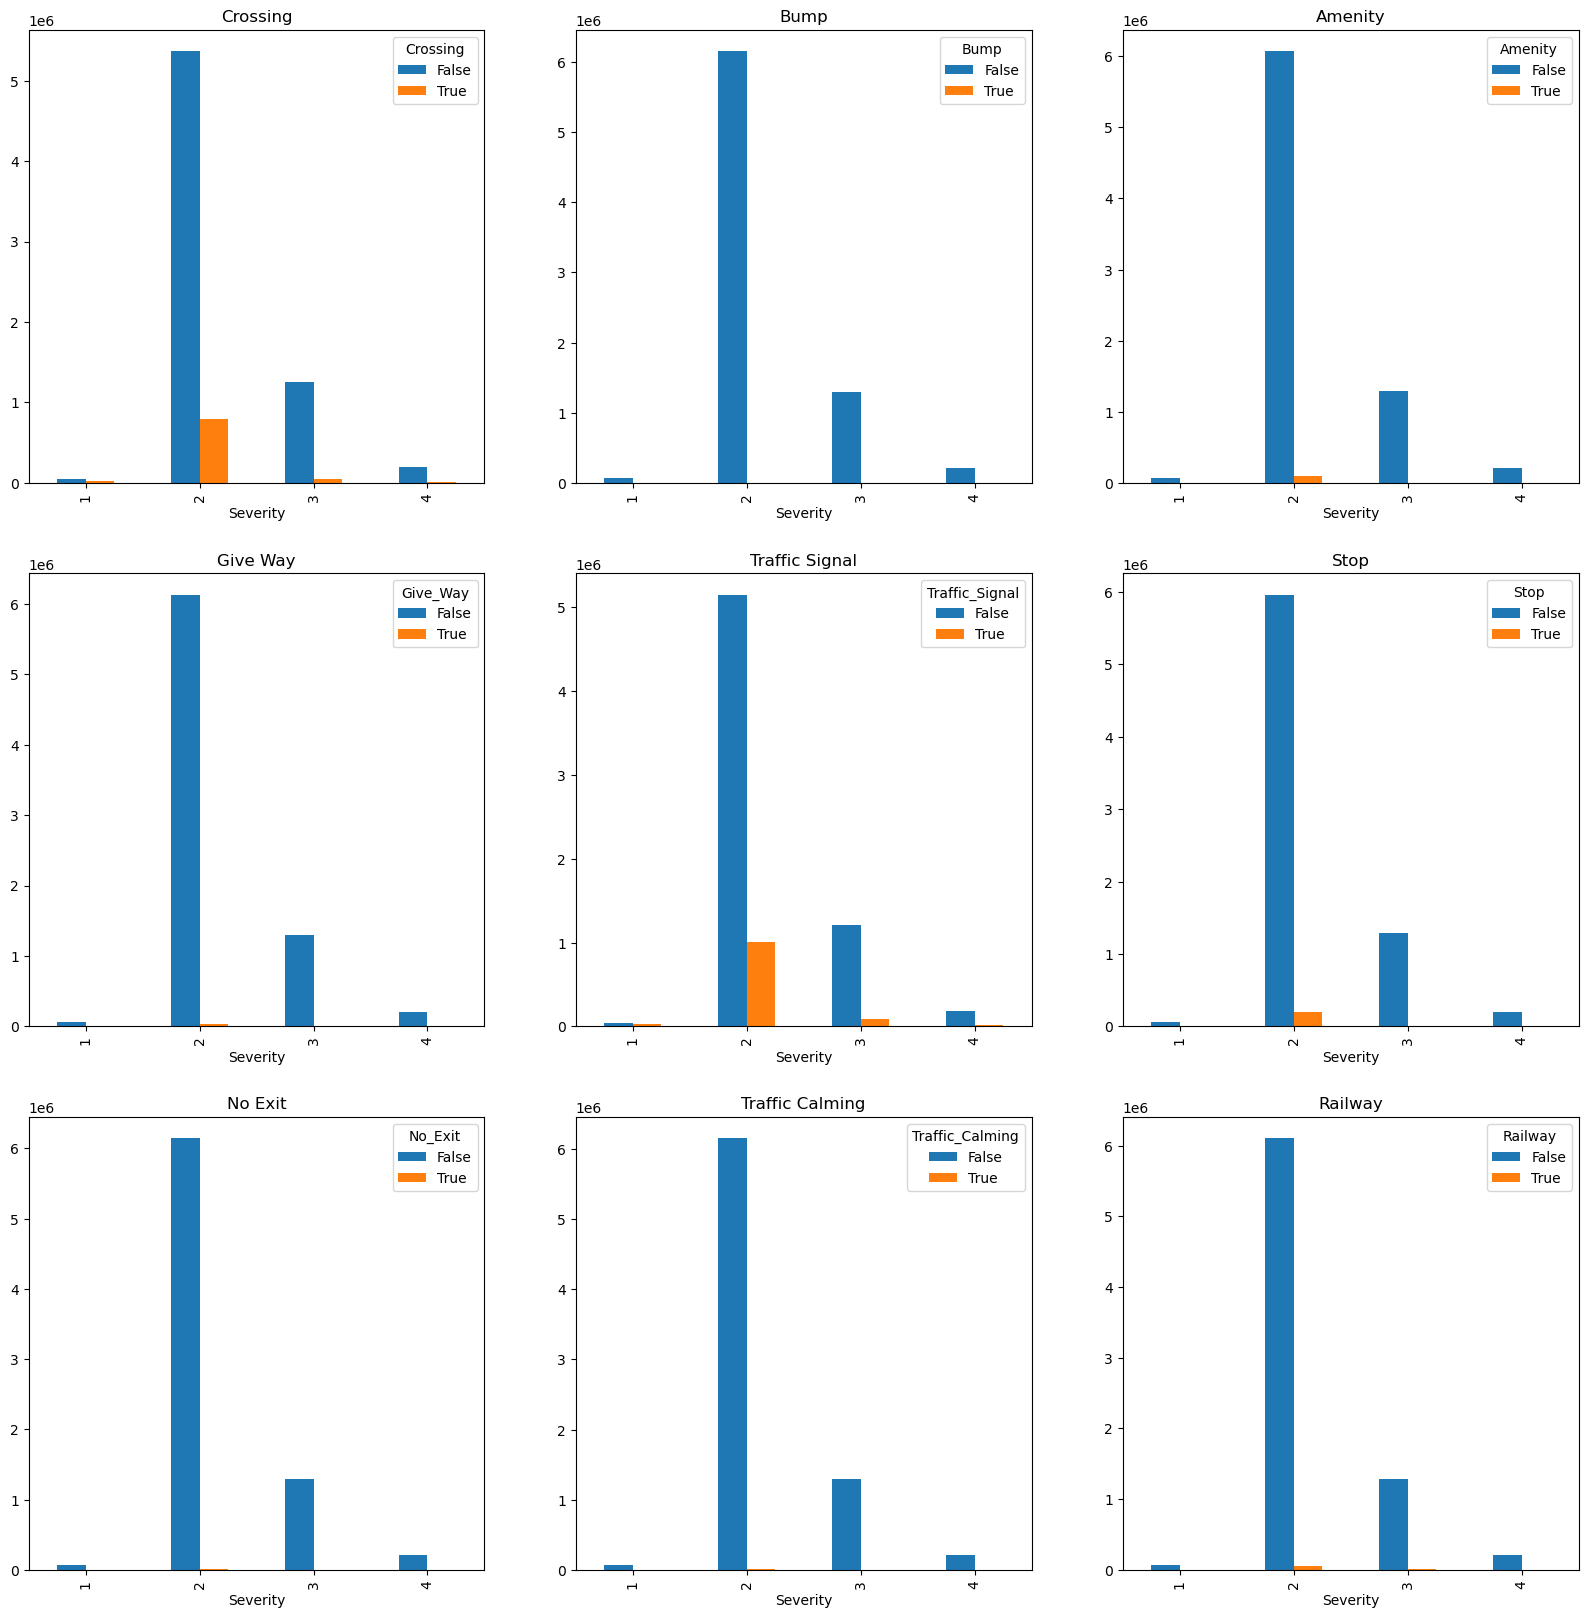

In [326]:
fig, ax = plt.subplots(3,3, figsize=(20, 20))

crossing.unstack().plot(kind='bar', ax=ax[0,0], title="Crossing")
bump.unstack().plot(kind='bar', ax=ax[0,1], title="Bump")
amenity.unstack().plot(kind='bar', ax=ax[0,2], title="Amenity")
give_way.unstack().plot(kind='bar', ax=ax[1,0], title="Give Way")
traffic_signal.unstack().plot(kind='bar', ax=ax[1,1], title="Traffic Signal")
stop.unstack().plot(kind='bar', ax=ax[1,2], title="Stop")
no_exit.unstack().plot(kind='bar', ax=ax[2,0], title="No Exit")
traffic_calming.unstack().plot(kind='bar', ax=ax[2,1], title="Traffic Calming")
railway.unstack().plot(kind='bar', ax=ax[2,2], title="Railway")